# CDS Identifier & Codon Usage Calculator #

This notebook will take a fasta file filled with cDNA sequences and identify the cds (which the program assumes is the largest sequence present starting with a start codon and ending with an in-frame stop codon. 

## Imports ##
This notebook requires the re library, which comes pre-installed if installing Python via Anaconda (https://www.anaconda.com/products/individual). This cell also defines the dictionary used to store the counts for each codon, the starting value for all codons is 0.

In [1]:
import re
regex = re.compile("[^a-zA-Z]")
codondict = {'ATT':0,'ATC':0,'ATA':0,'CTT':0,'CTC':0,'CTA':0,'CTG':0,'TTA':0,'TTG':0,'GTT':0,'GTC':0,'GTA':0,'GTG':0,'TTT':0,'TTC':0,'ATG':0,'TGT':0,'TGC':0,'GCT':0,
             'GCC':0,'GCA':0,'GCG':0,'GGT':0,'GGC':0,'GGA':0,'GGG':0,'CCT':0,'CCC':0,'CCA':0,'CCG':0,'ACT':0,'ACC':0,'ACA':0,'ACG':0,'TCT':0,'TCC':0,'TCA':0,'TCG':0,
             'AGT':0,'AGC':0,'TAT':0,'TAC':0,'TGG':0,'CAA':0,'CAG':0,'AAT':0,'AAC':0,'CAT':0,'CAC':0,'GAA':0,'GAG':0,'GAT':0,'GAC':0,'AAA':0,'AAG':0,'CGT':0,'CGC':0,
             'CGA':0,'CGG':0,'AGA':0,'AGG':0}

## Functions ##

The first function identifies the cDNA sequence from the fasta file (in fasta files the name of the sequence is on a line starting with '>', the sequence itself is on the lines following this). 

The second function identifies the start codon (the first ATG) and the stop codon (the first in-frame TAA, TAG or TGA). The function adds a space between every codon from the start codon. 

The third function takes the coding sequences from function 2, as well as the codon dictionary defined in the cell above, and counts every codon identified for all of the sequences in the fasta file and updates the records the counts in the dictionary.

The forth function saves the results as a csv file.

In [2]:
def identifying_sequences(file_location):
    '''This function identifies each cDNA sequence from the fasta file and adds it as an item to a list, 
    the ouptut is a list of unlabelled cDNA sequences. If labelling information needs to be retained, 
    simply create an empty list and fill this with the labels in the same order as the sequences.'''
    sequences = []
    temp_seq = ""
    with open(file_location, "r") as open_file:
            for line in open_file:
                if line[0] == '>':
                    sequences.append(temp_seq)
                    temp_seq = ""
                else:
                    temp_seq += line[:-1]
    sequences.append(temp_seq)
    sequences.pop(0)
    return sequences


def coding_sequence(sequences):
    '''This function takes the list of sequences and identifies the fist ATG codon as the start of the 
    sequence and the first in frame stop codon as the end of the sequence. It also adds a space between each codon. If no cds is identified
    (i.e. transcript has does not have a start codon followed by an in-frame stop codon) then the function returns NaN as the cds sequence'''
    coding_sequences_only = []
    for sequence in sequences:
        try:
            cds = max(re.findall(r'ATG(?:(?!TAA|TAG|TGA)...)*(?:TAA|TAG|TGA)',sequence), key = len)
            cds = " ".join(cds[i:i+3] for i in range(0, len(cds), 3))
        except: 
            cds = 'NaN'
        coding_sequences_only.append(cds)
    return coding_sequences_only
    
def countingcodons(codons, codondict):
    '''This function takes the sequence which has been separated into codons and counts each one. Output is an updated dictionary
    with total counts for each codon.'''
    for codon in codons:
        if codon in codondict:
            codondict[codon] += 1
        else:
            continue
    return codondict

def writingcsv(codondict, outputfile_name):
    '''This function saves the dictionary with codons and counts as a csv file.'''
    with open(outputfile_name+'/codon_usage.csv', 'w') as f:
        for key in codondict.keys():
            f.write("%s,%s\n"%(key,codondict[key]))

## Input File ##
Please provide the complete path to your fasta file with cDNA sequences. If you save the file in the same directory as this notebook just input the name of the file (e.g. sequences.txt) 
The cell below will output a csv file (called codonusage.csv) with the codons in one column and the number of times that codon is used in another column. 

In [3]:
sequences = identifying_sequences(input("Enter file name:"))
coding_sequences = coding_sequence(sequences)
for sequence in coding_sequences:
    codons = sequence.split(' ')
    codondict = countingcodons(codons, codondict)
outputfile_name = input("Enter filepath for output files:")
writingcsv(codondict, outputfile_name)

Enter file name: /Users/carl/Documents/christmas_2021_work/general_juypternotebooks/data_files/Arabidopsis_thaliana.TAIR10.cdna.all.fa
Enter filepath for output files: /Users/carl/Documents/christmas_2021_work/general_juypternotebooks/data_files


## Figures ##
Run the cell below to produce a simple bar chart figure that summarises the codon usage results for the input fasta file. The line of code for saving the figure is deactivated by default and the figures will all be displayed in the viewport. The cell requires both pandas and matplotlib to create the plots, these are imported within the cell.

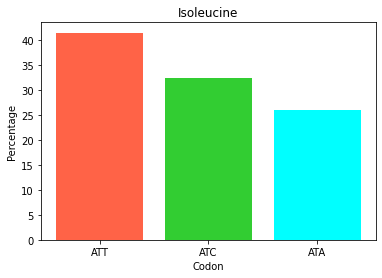

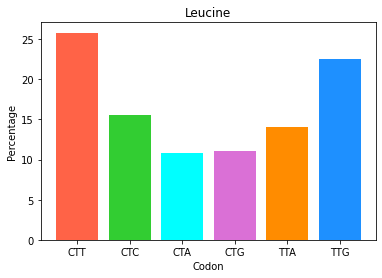

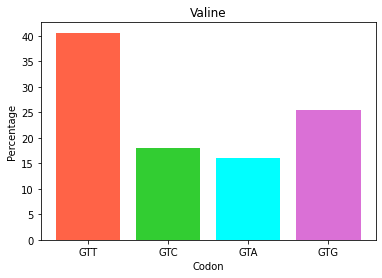

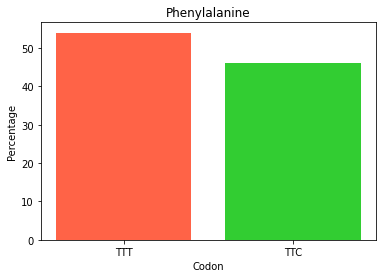

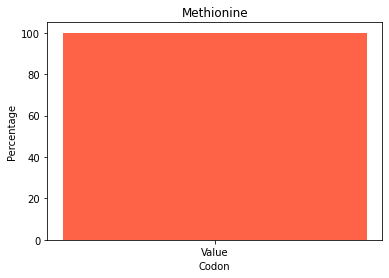

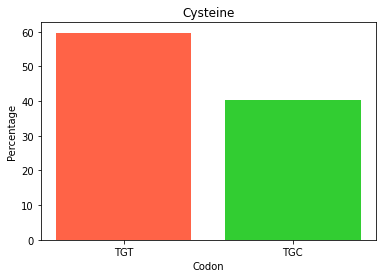

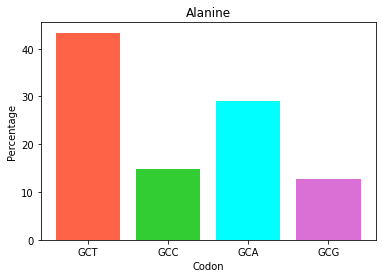

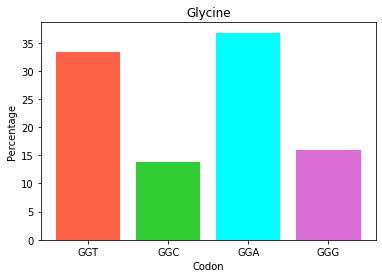

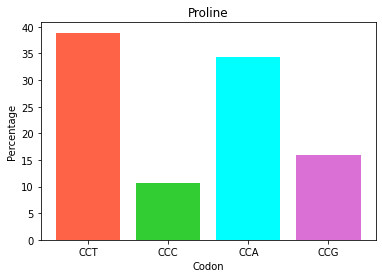

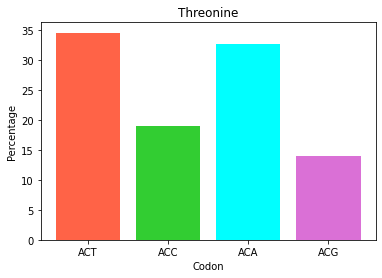

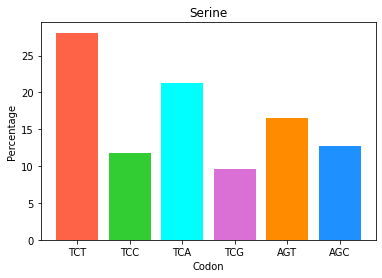

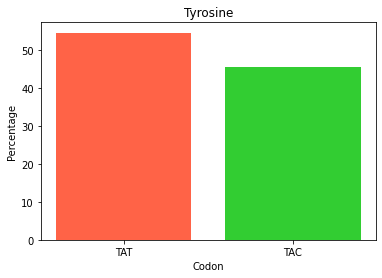

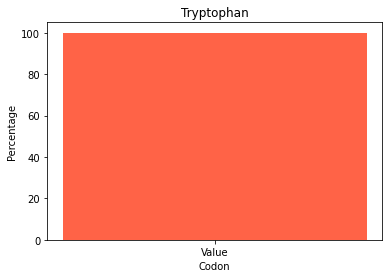

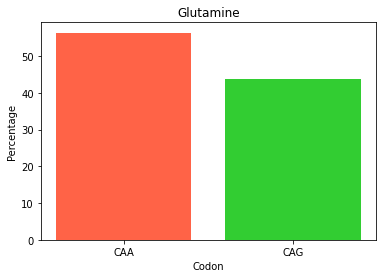

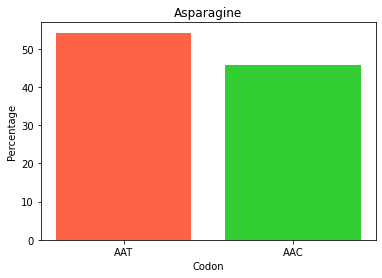

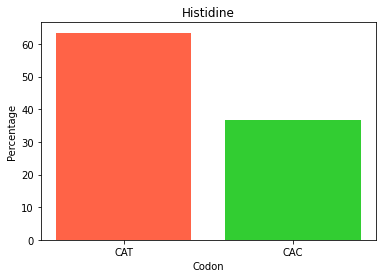

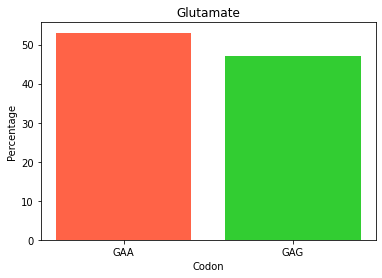

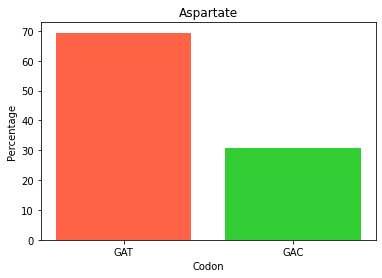

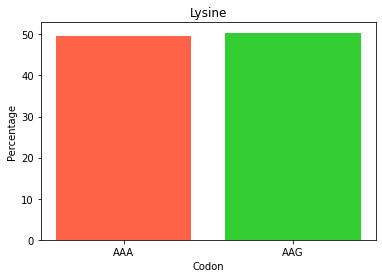

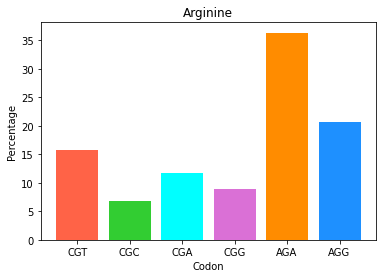

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
df = pd.DataFrame.from_dict(codondict, orient = 'index', columns = ['Value'])
I = df.iloc[:3]
L = df.iloc[3:9]
V = df.iloc[9:13]
F = df.iloc[13:15]
M = df.iloc[15]
C = df.iloc[16:18]
A = df.iloc[18:22]
G = df.iloc[22:26]
P = df.iloc[26:30]
T = df.iloc[30:34]
S = df.iloc[34:40]
Y = df.iloc[40:42]
W = df.iloc[42]
Q = df.iloc[43:45]
N = df.iloc[45:47]
H = df.iloc[47:49]
E = df.iloc[49:51]
D = df.iloc[51:53]
K = df.iloc[53:55]
R = df.iloc[55:]
list_of_df = [I,L,V,F,M,C,A,G,P,T,S,Y,W,Q,N,H,E,D,K,R]
titles = ['Isoleucine', 'Leucine', 'Valine', 'Phenylalanine', 'Methionine', 'Cysteine', 'Alanine',
          'Glycine', 'Proline', 'Threonine', 'Serine', 'Tyrosine', 'Tryptophan', 'Glutamine',
          'Asparagine', 'Histidine', 'Glutamate', 'Aspartate', 'Lysine', 'Arginine']
colours = ['tomato', 'limegreen', 'cyan', 'orchid', 'darkorange', 'dodgerblue']
for i in range(len(list_of_df)):
    temp_df = list_of_df[i]
    temp_df.Value = temp_df.Value/temp_df.Value.sum()*100
    plt.bar(temp_df.index, temp_df.Value, color = colours)
    plt.ylabel('Percentage')
    plt.xlabel('Codon')
    plt.title(titles[i])
    #plt.savefig(titles[i]+'.png', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
    plt.show()
    plt.close()